# Trabajo semanal 1

Para este trabajo se preparó un programa para diseñar y parametrizar señales. En este caso, se buscó graficar una función senoidal.

Tomando de referencia la siguiente función:

\begin {equation}
X(t) = A \sin(\omega t + \phi)
\end {equation}

Seguido de fijar una cantidad \( N \) de muestras digitalizadas y una frecuencia para el ADC. Finalmente, graficar dicha función.

Como agregado para el experimento, se probó con distintas frecuencias.



Consigna:

programar una función que genere señales senoidales y que permita parametrizar:
        la amplitud máxima de la senoidal (volts)
        su valor medio (volts)
        la frecuencia (Hz)
        la fase (radianes)
        la cantidad de muestras digitalizada por el ADC (# muestras)
        la frecuencia de muestreo del ADC.
        
    es decir que la función que uds armen debería admitir se llamada de la siguiente manera

    tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)
    Recuerden que tanto xx como tt deben ser vectores de 

In [34]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal

In [35]:
#Funciones

def funcion_sen(vmax,dc,ff,ph,nn,fs):
    ts=1/fs
    t=np.linspace(0,(nn-1)*ts,nn).flatten()
    argg=2*np.pi*ff*t + ph
    x = vmax * (np.sin(argg)) + dc
    return [t,x]
    
def funcion_cuadrada(vmax,dc,ff,ph,nn,fs):
    ts = 1/fs
    t=np.linspace(0,(nn-1)*ts,nn).flatten()
    N = 10000
    x = vmax*((4/np.pi)*sum(np.sin((2*n-1)*2*np.pi*ff*t+ph)/(2*n-1) for n in range(1,N-1))) + dc
    return[t,x]

def funcion_cuadrada_2(vmax,dc,ff,ph,nn,fs):
    ts=1/fs
    t=np.linspace(0,(nn-1)*ts,nn).flatten()
    x=vmax * signal.square(2 * np.pi * ff * t + ph) + dc
    return[t,x]

N=1000 #La cantidad de muestras digitalizada por el ADC
Fs=1000 #Frecuencia de muestreo del ADC



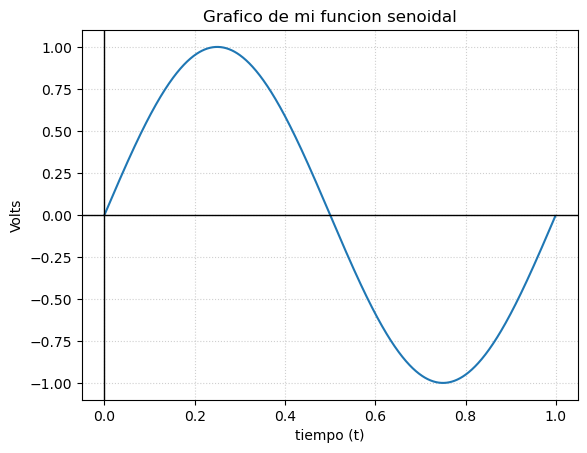

In [36]:
#Experimento N1
F0=1
                                 
tt,xx = funcion_sen(1,0,F0,0,N,Fs)

plt.plot(tt,xx)
plt.xlabel('tiempo (t)')
plt.ylabel('Volts')
plt.title('Grafico de mi funcion senoidal')
plt.axhline(0,color="black",linewidth=1)
plt.axvline(0,color="black",linewidth=1)
plt.grid(True,linestyle=":",alpha=0.6)
plt.show()

Análisis: Como se observa en el gráfico, la señal tiene una frecuencia de 1 Hz. Esto es esperable debido a la forma en que se planteó la función y el vector que la representa.

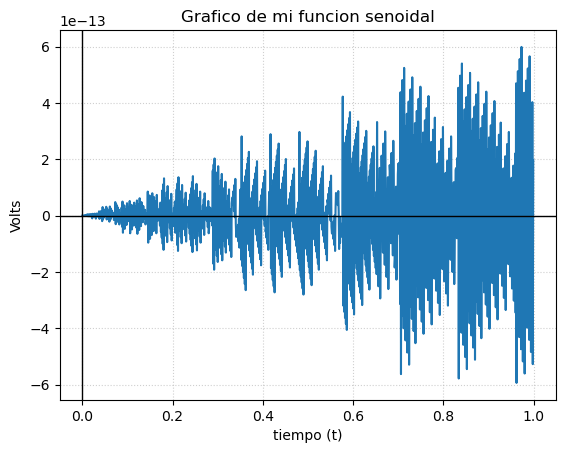

In [58]:
#Experimento N2
F0=500
                                 
tt_1,xx_1= funcion_sen(1,0,F0,0,N,Fs)


plt.plot(tt_1,xx_1)
plt.xlabel('tiempo (t)')
plt.ylabel('Volts')
plt.title('Grafico de mi funcion senoidal')
plt.axhline(0,color="black",linewidth=1)
plt.axvline(0,color="black",linewidth=1)
plt.grid(True,linestyle=":",alpha=0.6)
plt.show()

Analisis: Aca la frecuencia propuesta es igual a la frecuencia muestro, lo que produce es un error acumulativo en la señal senoidal en donde esas acumulaciones aumentan la amplitud de la señal a traves del tiempo.


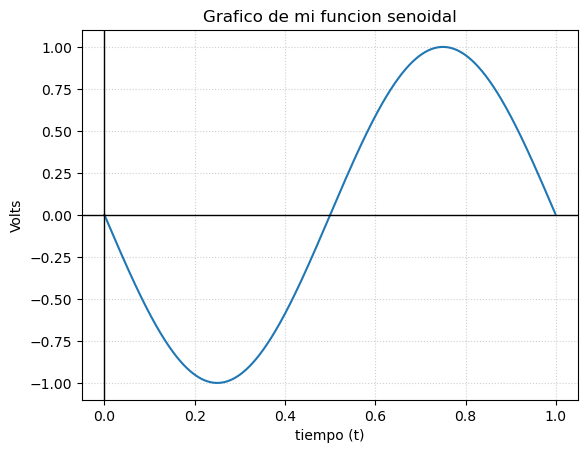

In [48]:
#Experimento N3

F0=999
                                 
tt_3, xx_3 = funcion_sen(1,0,F0,0,N,Fs)


plt.plot(tt_3,xx_3)
plt.xlabel('tiempo (t)')
plt.ylabel('Volts')
plt.title('Grafico de mi funcion senoidal')
plt.axhline(0,color="black",linewidth=1)
plt.axvline(0,color="black",linewidth=1)
plt.grid(True,linestyle=":",alpha=0.6)
plt.show()

Analisis: Como se puede notar el grafico es igual al experimento 1 pero desfasado 180°, producido por una ambigueadad generada por la frecuencia propuesta. Ya que toma los trenes de delta siguientes al 0.

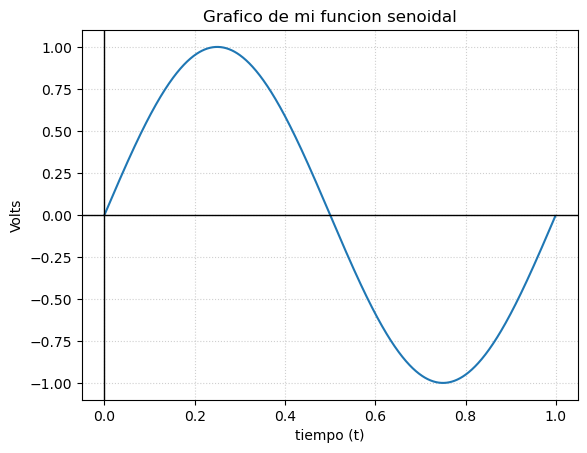

In [49]:
#Experimento N4    
N=1000 #La cantidad de muestras digitalizada por el ADC
Fs=1000 #Frecuencia de muestreo del ADC
F0=1001
                                 
tt_4, xx_4 = funcion_sen(1,0,F0,0,N,Fs)

plt.plot(tt_4,xx_4)
plt.xlabel('tiempo (t)')
plt.ylabel('Volts')
plt.title("Grafico de mi funcion senoidal")
plt.axhline(0,color="black",linewidth=1)
plt.axvline(0,color="black",linewidth=1)
plt.grid(True,linestyle=":",alpha=0.6)
plt.show()

Analisis: Parecido al caso anterior, solo que ahora el tren de deltas coincide con la frecuencia de 1Hz debido al aliasing, generando asi una ambiguedad. En clase se propuso como solucion usar un filtro pasa bajos para evitar estas ambiguedades

Ademas de probar con diferentes frecuencias, se me ocurrio intentar graficar una señal cuadrada utilizando la serie de Fourier de la siguiente funcion:
\begin{equation}
\
f(x) = 
\begin{cases} 
-1 & -\pi < x < 0 \\ 
1 & 0 < x < \pi 
\end{cases}
\
\end{equation}

Llegando asi a la Serie:
\begin{equation}
\frac{4}{\pi} \sum_{n=1}^{N-1} \frac{\sin\left((2n - 1) \cdot 2\pi \cdot f \cdot t\right)}{2n - 1}
\end{equation}

obteniendo:

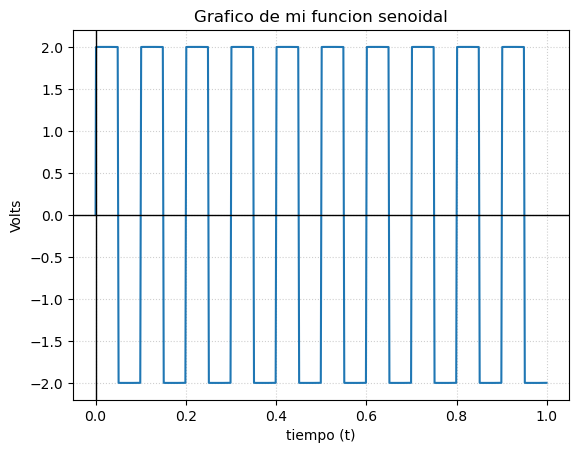

In [50]:
#Experimento N5

F0=10
                                 
tt_1,xx_1 = funcion_cuadrada(2,0,F0,0,N, Fs)

plt.plot(tt_1,xx_1)
plt.xlabel("tiempo (t)")
plt.ylabel("Volts")
plt.title("Grafico de mi funcion senoidal")
plt.axhline(0,color="black",linewidth=1)
plt.axvline(0,color="black",linewidth=1)
plt.grid(True,linestyle=":",alpha=0.6)
plt.show()


Igualmente no es necesario plantearlo asi, ya que hay una funcion que directamente toma esta señal sin la necesidad de plantear una serie:


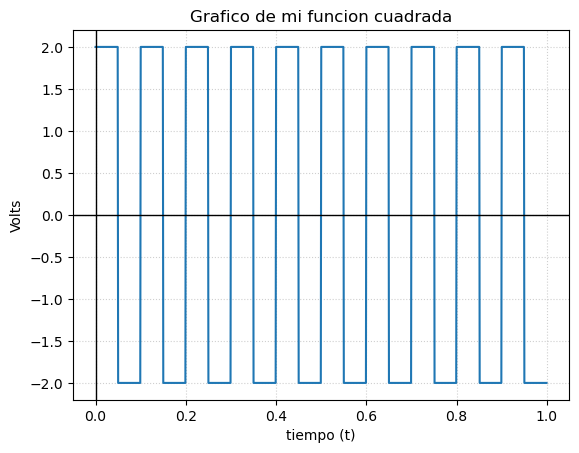

In [51]:
#Experimento N6

F0=10
                                 
tt_6,xx_6 =funcion_cuadrada_2(2,0,F0,0,N,Fs)

plt.plot(tt_6,xx_6)
plt.xlabel("tiempo (t)")
plt.ylabel("Volts")
plt.title("Grafico de mi funcion cuadrada")
plt.axhline(0,color="black",linewidth=1)
plt.axvline(0,color="black",linewidth=1)
plt.grid(True,linestyle=":",alpha=0.6)
plt.show()

Se uso IA principalmente para plasmar las ecuaciones mediante LATEX, ademas para entender como funciona las funciones de ploteo y comprender mas detalladamente como retornar correctamente un vector de una funcion. 